<a href="https://colab.research.google.com/github/JZBarsky/TestRepo/blob/master/project_2_Josh_B_edits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import mpmath as mp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


First we recreate the is prime list from notebook 3.

In [2]:
def isprimelist(n):
  flags = np.full(n,True) #creates a list of True
  flags[:2] = False #sets 0 and 1 to false
  p = 2
  while p <= np.sqrt(n): 
    if flags[p]: #If the number is prime then this formula sets all multiples of that number to be false
      flags[p*p::p] = [False] * len(flags[p*p::p]) 
    p += 1
  return flags

We then modify this function to count the amount of primes up to every value that is less than or equal to the input.

In [3]:
def primesuptolist(n):
  flags = np.full(n,True)
  flags[:2] = False
  p = 2
  uptolist = np.zeros(n) #Initializing a list of zeros
  count = 0 #This will be our counter
  while p < n: #We sacrifice some of the efficiency of the original function, as our list needs the p value to count all the way up to our input to create the full list
    if flags[p] == True:
      flags[p*p::p] = [False] * len(flags[p*p::p])
      count += 1  #If flags[p] is True, The value p must be a prime number so we increase our count
      uptolist[p] = count #then the new count is added to the list
    else:
      uptolist[p] = count #if flags[p] is not a prime number, then the count is not increase, but the value is still added to our list
    p += 1
  return uptolist

In [ ]:
primesuptolist(1000000)

array([0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 7.8498e+04, 7.8498e+04,
       7.8498e+04])

Graph of the primes up to 1 million

Text(0, 0.5, 'Number of primes.')

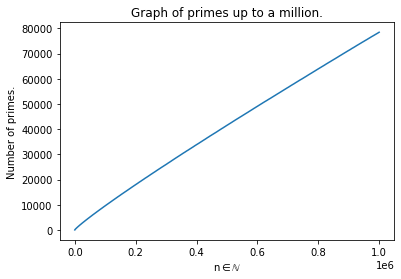

In [ ]:
xval = np.arange(0,1000000)
yval = primesuptolist(1000000)
plt.plot(xval,yval)
plt.title('Graph of primes up to a million.')
plt.xlabel('n$\in\mathbb{N}$')
plt.ylabel('Number of primes.')

One technique is to find the graph of the logarithmic integral, but the calculation would take much too long to calculate.

In [ ]:
#no longer needed - too long to calculate.
def Log_int_array(h):   #The li function from mpmath can't take an array as an input. We use this funtion to create array with the values given by the logarithmic integral function. 
      Values = np.zeros(h)
      for i in range(2,h):
       val = mp.li(i)
       Values[i] = val
      return Values



In [ ]:
#no longer needed - too long to calculate.
Values_for_upper_bound = Log_int_array(1000000)
inputs = np.array(range(1000000))

In [ ]:
%timeit Log_int_array(1000000)

50.6 s ± 764 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Another technique is to use the logarithmic sum $\sum_{n=2}^{x}\frac{1}{log(n)}$, which turns out to be a much faster implementation.

In [ ]:
#much faster to calculate
Larray = np.log(np.arange(2, 10**6+1))
ILarray = 1/Larray
y = np.cumsum(ILarray) #Logarithmic sum

In [ ]:
#makes size of x == size of y.
x = np.array(range(1000000-1))

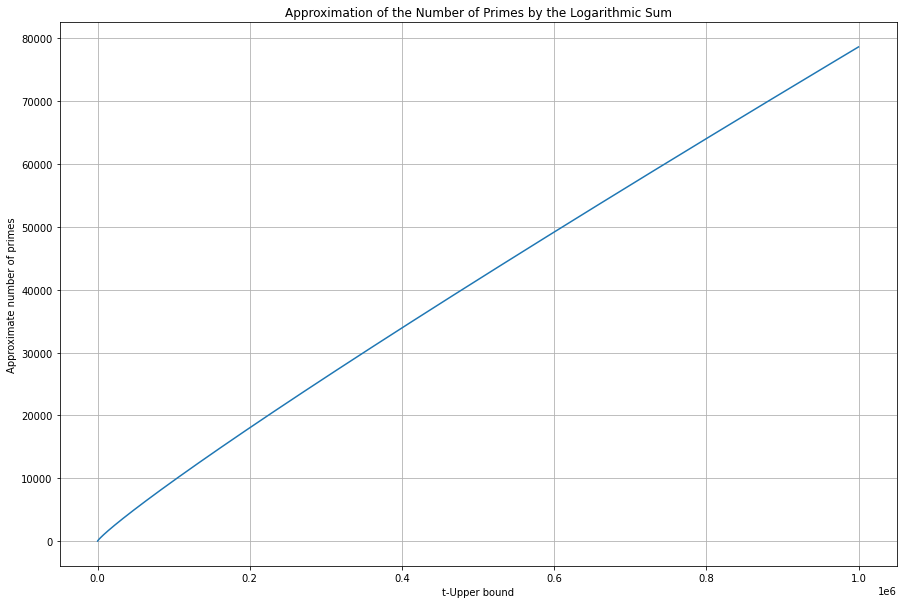

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(x, y) 
plt.title('Approximation of the Number of Primes by the Logarithmic Sum')
plt.xlabel('t-Upper bound')
plt.ylabel('Approximate number of primes')
plt.grid(True)
plt.show()

This graph looks very close to the real number of primes up to 1 million! 

So much so, that to the naked eye you it's not obvious there is any difference.

Here is the graph of both the number of primes and approximation:

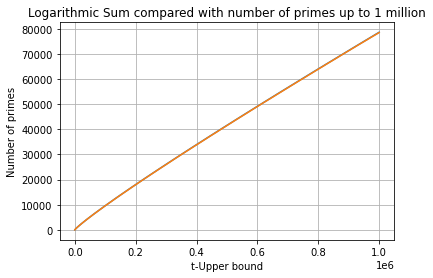

In [ ]:
plt.plot(x, y)
plt.plot(xval,yval)
plt.title('Logarithmic Sum compared with number of primes up to 1 million')
plt.xlabel('t-Upper bound')
plt.ylabel('Number of primes')
plt.grid(True)
plt.show()

At this scope the graphs perfectly overlay eachother, so we will calculate the error between the plots.

In [ ]:
errorvals = Values_for_upper_bound - yval

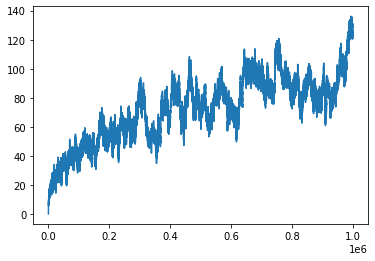

In [ ]:
plt.plot(xval,errorvals)

as we see the logarithmic integral grows just slightly faster than the number of primes.

Note worthy ideas: Visualization Reimanian, Cramer's model of fake primes.

In [ ]:
def primesuptolist(n):
  flags = np.full(n,True)
  flags[:2] = False
  p = 2
  uptolist = np.zeros(n) #Initializing a list of zeros
  count = 0 #This will be our counter
  while p < n: #We sacrifice some of the efficiency of the original function, as our list needs the p value to count all the way up to our input to create the full list
    if flags[p] == True:
      flags[p*p::p] = [False] * len(flags[p*p::p])
      count += 1  #If flags[p] is True, The value p must be a prime number so we increase our count
      uptolist[p] = count #then the new count is added to the list
    else:
      uptolist[p] = count #if flags[p] is not a prime number, then the count is not increase, but the value is still added to our list
    p += 1
  return uptolist

##**Gauss Counting Function vs. Riemann Counting Function**

###$\pi(x)$ vs $R(x)$

The Prime Counting Function $\pi(x)$ is a function that is used to count the primes. This is a step graph where at each prime number on the x-axis the count goes up by 1 on the y-axis. 

The Riemann Prime Counting Function $R(x)$ is a function that is closely resembles the output of $\pi(x)$, where $R(x) = \sum_{n=1}^{\infty}\frac{\mu(n)}{n}li(x^{1/n})$.
<br><br><br>
It's also important to note that the Riemann Prime Counting Function is *identical* to the Gramm series $G(x)$, which utilizes the zeta function $\zeta(z)$. Where $G(x) = 1 + \sum_{k=1}^{\infty}\frac{ln(x)^k}{k k ! \zeta(k+1)}$. This distinctly draws a connection between the prime numbers and complex values $\mathbb{C}$ using the Zeta function $\zeta(z)$.
<br><br><br>
The following link contains more information on these functions described above.

https://mathworld.wolfram.com/RiemannPrimeCountingFunction.html

The following page is a very descriptive page describing an approach of adding non trivial zeros of $\zeta(z)$ that seemed a bit complicated to code in this project, but was very interesting to learn about.

https://empslocal.ex.ac.uk/people/staff/mrwatkin/zeta/encoding1.htm

A cool demo of adding the non trivial zeros can be found at the link below.

https://demonstrations.wolfram.com/HowTheZerosOfTheZetaFunctionPredictTheDistributionOfPrimes/

Another interesting source is the following YouTube video.

https://www.youtube.com/watch?v=zlm1aajH6gY

**First we define $\mu(n)$:**

This is also called the Mobius function, but this is not the focus of this project. This is only an additional function we must define in order to have a functioning $R(x)$ function.

In [4]:
def mu(n):
    if n == 1:
        return 1
    else:
        p = 0
        factors = fact(n) #returns an array of factors of n.
        for i in set(factors): #set() creates a set object, which is iterable.
            if factors.count(i) > 1: #count() counts the instances of an element in the list.
                return 0
            else:
                p = p + 1 #p counts distinct primes in the list
        if p%2 == 0:
            return 1
        else:
            return -1

def fact(n): #factorizes a number n into its primes
    array = []
    i = 2
    while i**2 <= n: #same as while i <= sqrt(n)
        if n%i != 0: #if i is not a factor
            i = i + 1 #move on
        else:
            n = n//i #drops n by a factor of i
            array.append(i) #adds the factor i to the array
    if n>1: #if there is an additional factor of n, append it
        array.append(n)
    return array

**Now we define $R(x):$**

In [22]:
def R(x):
  ans = 0
  for i in range(10):
    ans += (mu(i+1)/(i+1))*mp.li(x**(1/(i+1))) #R(x) sum that was described above.
  if np.isnan(float(ans)): #there is an instance of NaN where an exception must be made.
    return 0
  else:
    return (ans)

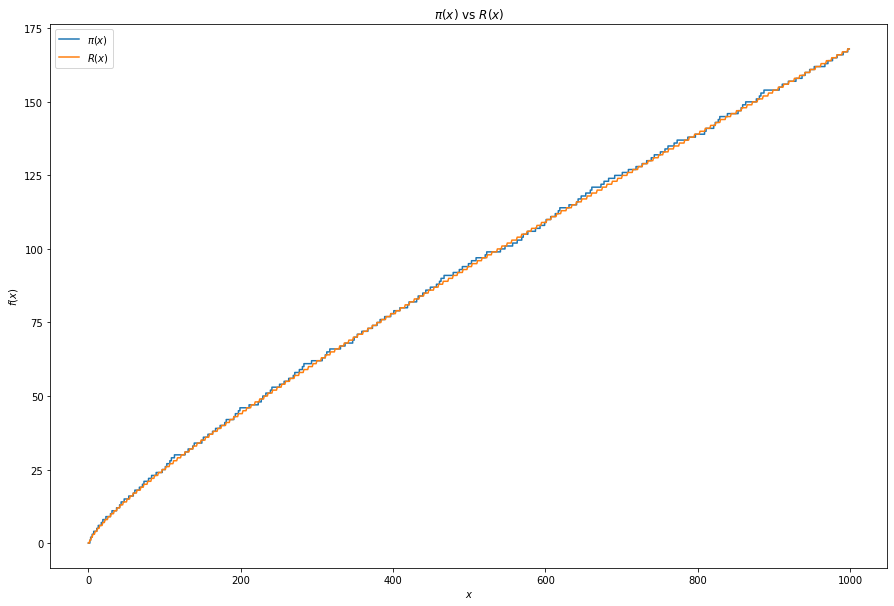

In [23]:
size=1000 #sample size to use. This is a little slow to work with so be mindful of the size.
(x, y) = np.arange(size), primesuptolist(size)
(x2, y2) = np.arange(size), np.array([int(R(xi)) for xi in np.arange(size)])
plt.figure(figsize=(15,10))
plt.step(x, y, where='post', label = '$\pi(x)$')
plt.plot(x2, y2, label = '$R(x)$')
plt.title('$\pi(x)$ vs $R(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()


Clearly, both $\pi(x)$ and $R(x)$ are close.

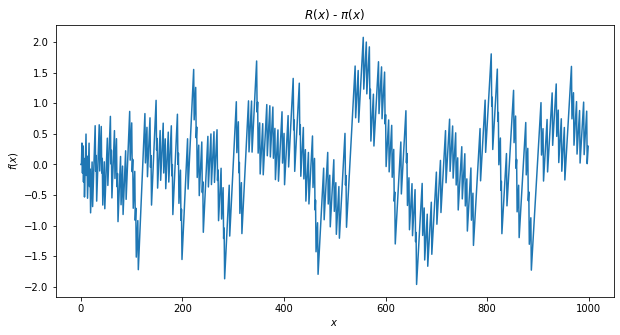

In [27]:
size=1000 #sample size to use. This is a little slow to work with so be mindful of the size.
(x3, y3) = np.arange(size),  np.array([R(xi) for xi in np.arange(size)]) - primesuptolist(size)
plt.figure(figsize=(10,5))
plt.plot(x3, y3)
plt.title('$R(x)$ - $\pi(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

This is how close the two functions are. Wow!